In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report
)

In [24]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    print(f"Dataset loaded successfully with shape: {data.shape}")
    return data

In [25]:
# exploring data

def explore_data(data):
    print("\n" + "="*50)
    print("DATA EXPLORATION")
    print("="*50)

    print("\nFirst 5 rows:")
    print(data.head())

    print("\nDataset Info:")
    print(data.info())

    print("\nStatistical Summary:")
    print(data.describe())

    print("\nMissing Values:")
    print(data.isnull().sum())

    print("\nChurn Distribution:")
    print(data['Churn'].value_counts())

    plt.figure(figsize=(8, 5))
    sns.countplot(x='Churn', data=data)
    plt.title('Customer Churn Distribution')
    plt.show()

In [26]:
# preprocessing data

def preprocess_data(data):
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

    data.drop('customerID', axis=1, inplace=True)

    binary_cols = [
        'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
        'Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies'
    ]
    for col in binary_cols:
        data[col] = data[col].map({'Yes': 1, 'No': 0})

    data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

    data = pd.get_dummies(
        data,
        columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines']
    )

    return data

In [27]:
def prepare_features(data):
    X = data.drop('Churn', axis=1)
    y = data['Churn']
    X = X.fillna(X.median())
    return X, y

In [28]:
# splitting and scaling data

def split_and_scale_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled

In [29]:
# training models with logistic regression

def train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    preds = model.predict(X_test_scaled)

    print("Accuracy:", accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))

    return model

In [30]:
# training models with random forest

def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))

    return model

Dataset loaded successfully with shape: (7043, 21)

DATA EXPLORATION

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...

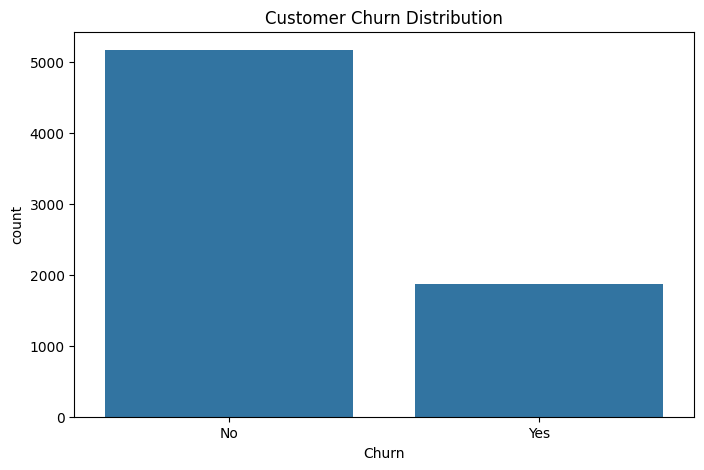

/tmp/ipykernel_5500/3116389180.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


Accuracy: 0.8204400283889283
[[934 102]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Accuracy: 0.7977288857345636
[[942  94]
 [191 182]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [31]:
def main():
    data = load_data("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
    explore_data(data)
    data = preprocess_data(data)
    X, y = prepare_features(data)
    X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = split_and_scale_data(X, y)
    train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test)
    train_random_forest(X_train, y_train, X_test, y_test)


if __name__ == "__main__":
    main()